<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/Binary_Classification_%26_Performance_Measures%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook covers:
  

1.   how to train binary classifiers,
2.   choose the appropriate metric for your task,
3.  evaluate your classifiers using cross-validation,
4. select the precision/ recall tradeoff that fits your needs, 
5. and compare various models using ROC curves and ROC AUC scores.

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape


(70000, 784)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:

some_digit  = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

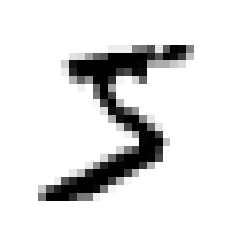

In [8]:
plt.imshow(some_digit_image , cmap = mpl.cm.binary , interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
y[0]

'5'

In [10]:
import numpy as np
y = y.astype(np.uint8)

In [11]:
X_train , X_test , y_train , y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [12]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test==5)


In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict(X_test)

array([False, False, False, ..., False,  True, False])

**Cross_Validation**

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train , y_train_5 , cv=3 )
y_train_pred


array([ True, False, False, ...,  True, False, False])

**Performance Measures**




# 1.   Confusion Matrix






In [16]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
_confusion_matrix = confusion_matrix ( y_train_5,y_train_pred )
_precision_score = precision_score ( y_train_5,y_train_pred )
_recall_score =recall_score ( y_train_5,y_train_pred )
_f1_score = f1_score ( y_train_5,y_train_pred )

print (_confusion_matrix )
print (_precision_score )
print (_recall_score )
print (_f1_score )

[[53892   687]
 [ 1891  3530]]
0.8370879772350012
0.6511713705958311
0.7325171197343846


In [17]:
y_score = sgd_clf.decision_function(X_train)
y_score

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

In [18]:
#Returning the y_scores of decision unction instead of returning predictions , in case we need to manually set threshold
y_scores = cross_val_predict(sgd_clf,X_train , y_train_5 , cv= 3 , method='decision_function')


**1st way to select good precision/recall tradeoff**

In [19]:
# how to define sutiable threshold , by using precision_recall_curve()
from  sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

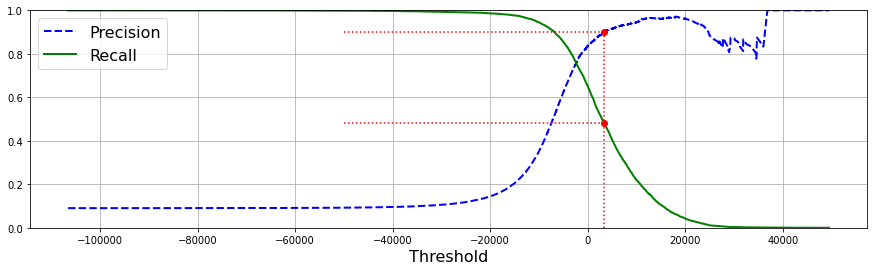

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.grid(True)
    plt.ylim([0, 1])

recall_90_percision = recalls[np.argmax ( precisions>= 0.90 )]
Threshold_90_percision = thresholds[np.argmax ( precisions>= 0.90 )]

plt.figure(figsize=(15, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([Threshold_90_percision,Threshold_90_percision],[0.,0.9],"r:")
plt.plot([-50000,Threshold_90_percision],[0.9,0.9],"r:")
plt.plot([-50000,Threshold_90_percision],[recall_90_percision,recall_90_percision],"r:")
plt.plot([Threshold_90_percision],[0.9],"ro")
plt.plot([Threshold_90_percision],[recall_90_percision],"ro")


plt.show()

When thrshold = 0 , then Recall = 60 % and Percision = 90 %
 

*   Recall means how many positive instances  were correctly predicted.
*   Percision means how many instances the models classifies as positive 

**2nd way to select good thrushold**

In [19]:
#to find  the lowest threshold that gives you at least 90% precision , use np.argmax() which
#will give us the first index of the maximum value, which in this case means the first True value
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

3370.019499143958

In [20]:
# To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [21]:
#Let’s check these predictions’ precision and recall:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [22]:
recall_score(y_train_5, y_train_pred_90)
#P.S. A high-precision classifier is not very useful if its recall is too low! If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

0.4799852425751706

**Percision/Recall Curve (P/R Curve)**

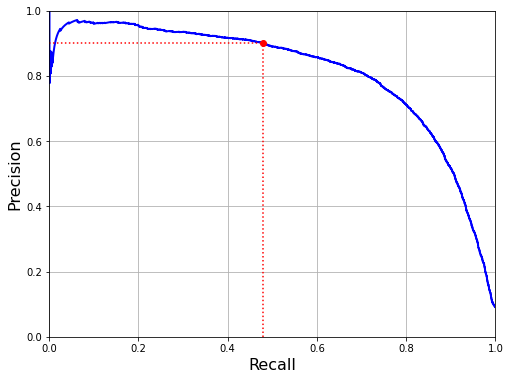

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.plot([recall_90_percision,recall_90_percision],[0.,0.9],"r:")
plt.plot([0.0,recall_90_percision],[0.9,0.9],"r:")
plt.plot([recall_90_percision],[0.9],"ro")

# save_fig("precision_vs_recall_plot")
plt.show()

# 2.   ROC Curve



In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [32]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
       1.        ])

In [33]:
tpr

array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [34]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

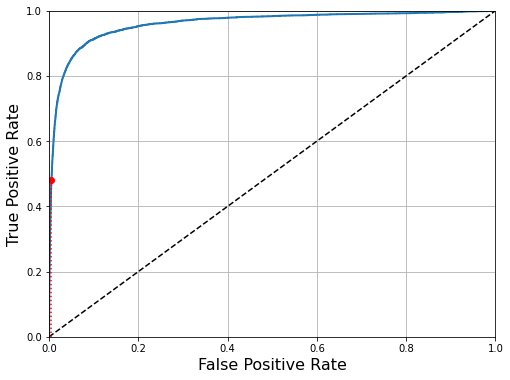

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 =fpr[np.argmax(tpr>= recall_90_percision)]
plt.plot([fpr_90,fpr_90],[0,recall_90_percision],"r:")
plt.plot([0,fpr_90],[recall_90_percision,recall_90_percision],"r:")
plt.plot([fpr_90],[recall_90_percision],"ro")


# save_fig("roc_curve_plot")
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score( y_train_5 , y_scores)

0.9604938554008616

**Precision/Recall curve vs. ROC AUC curve**

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright
corner).

**Comparing AUC between SDG and RF classifiers**

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier ( random_state= 42)


In [38]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

the RandomForestClassi
fier class does not have a decision_function() method. Instead it has a pre
dict_proba() method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5).
But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [39]:
y_scores_forest = y_probas_forest [:,1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [40]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

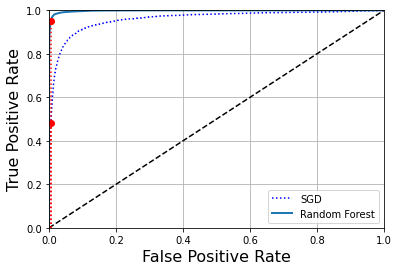

In [46]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >=fpr_90)]
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

plt.plot([fpr_90,fpr_90],[0,recall_90_percision],"r:")
plt.plot([0,fpr_90],[recall_90_percision,recall_90_percision],"r:")
plt.plot([fpr_90],[recall_90_percision],"ro")

plt.plot([fpr_90,fpr_90],[0, recall_for_forest],"r:")
plt.plot([fpr_90],[recall_for_forest],"ro")



plt.show()

the RandomForestClassifier’s ROC curve looks much
better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better:


In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [43]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [44]:
recall_score(y_train_5, y_train_pred_forest)


0.8662608374838591